## Statistical Modelling
- Statistical modelling is a way of using data to understand and predict the world.
- What we do:
1. Observe something in real life
2. Collect data about it
3. Use math to describe patterns in the data
4. Accept that data is noisy and uncertain

### Variables: The building blocks of models 
- A variable is simply something that can change.

#### Independent Variables(Inputs)
- AKA Predictor, Feature, Explanatory variable.
- Things that we perceive to have an influence or explain something else.
- They are what we put into the model.
- Usually denoted as $X, X_1, X_2,.....$

#### Dependent Variables(Output)
- AKA Response, Target
- This is what we want to predict, explain or understand.
- Depends on the independent variables.
- Usually denoted as $Y$


### What is a Statistical Model?
- This is a rule that connects inputs to outputs.
- Denoted as $Y = model(X) + error$
- We include the error because:
1. Measurements aren't perfect
2. People behave differently
3. The world of data is messy
- This error is also known as random error or noise.

#### Parameters: The knobs of the Model
- Parameters are numbers inside the model that control how it behaves.
- e.g: Straight line model
$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$
- Where : 
- $\beta_0$ -> Where the line starts   (Intercept)
- $\beta_1$ -> How steep the line is (Slope)


#### How do we find parameters?
- We don't guess parameters. Instead, we:
1. Try some parameter values
2. See how wrong the model is
3. Adjust the parameters
4. Repeat until the model is “least wrong”

This leads to $loss$.

#### What is loss?
- Loss is a figure that tells us how bad a prediction is.
- For each data point:
- Loss = actual value - predicted value

- Without loss:
1. We dont know which model is better
2. We cant improve the model
3. Learning is impossible

- *No loss = No learning*

#### Linear Regression
- This is the simplest statistical model.
- It assumes the relationship between $X$ and $Y$ is roughly a straight line.
- Model Equation:
$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$
- Where :  $ \varepsilon$ = random error

- Linear regression finds:
1. The best slope
2. The best intercept

#### Relationship between Linear Regression and Other Statistical Measures
1. Linear Regression and Mean
- If a stat model has no $X$ such that: 
$Y = \beta_0$ then the best value of $\beta_0$ is: $\beta_0$ = mean of $Y$
- This is to say the mean is the simplest statistical model.

2. Linear Regression and Variance
- Variance measures how spread out data is.
- Regression splits variance into two parts:
    1. Explained by the model.
    2. Not explained(error)
- This leads to:
$ R^2 $ = How much of Y the model explains 
- If $R^2$ = 0.70 then we could say that 70% of the variation in $Y$ is explained by $X$

3. Linear Regression and Correlation
- Correlation answers - Do $X$ and $Y$ move together?
- Regression answers - How much does $Y$ change when $X$ changes?

- *Statistical modelling is the process of using data, math, and probability to explain relationships and make predictions while accepting uncertainty.* 

### Linear Regression using Self Constructed Functions

In [14]:
# x = hours studied
# y = exam score

import numpy as np

# Independent variable (hours studied)
X = np.array([1, 2, 3, 4, 5])

# Dependent variable (exam score)
Y = np.array([50, 55, 65, 70, 75])

# function for calculating mean
def mean(x):
    return sum(x) / len(x)


#### Formula for computing slope:
$$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
               {\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$


In [15]:
# function for computing slope
def slope(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    
    numerator = sum((x - x_mean) * (y - y_mean))
    denominator = sum((x - x_mean) ** 2)
    
    return numerator / denominator

#### Formula for computing intercept:
$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$


In [16]:
# function for computing intercept
def intercept(x, y):
    return mean(y) - slope(x, y) * mean(x)

In [17]:
# fit the model
beta_1 = slope(X, Y)
beta_0 = intercept(X, Y)

beta_0, beta_1

(43.5, 6.5)

$ \beta_0$ = 43.5, $\beta_1$ = 6.5
- Regression equation is: $y = 43.5 + 6.5x$
- Intercept = 43.5 means that when hours studies = 0, the predicted exam score is 43.5
- Slope = 6.5 means for every additional hour studied, the exam score increases by 6.5 points on average ( This is the strength and direction of the relationship)


In [18]:
def predict(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

# Predict score for 6 hours of study
predict(6, beta_0, beta_1)


82.5

#### Intercept-Only Model(Null model)
- An intercept-only model ignores the predictor $X$ entirely and predicts the same value for every observation.
$$
y = \beta_0
$$
Which becomes:
$$
\beta_0 = \bar{y}
$$
Interpretation = “The best guess for any student’s score is simply the average exam score, regardless of hours studied.”

This model represents:
1. No relationship
2. Baseline performance
3. Null hypothesis model

In [19]:
def intercept_only_prediction(y):
    return mean(y)

y_bar = intercept_only_prediction(Y)
y_bar

63.0

- Why this model matters:
1. It is the reference model
2. All regression models must beat this model to be useful
3. It forms the basis of:
    - F-test
    - R² (coefficient of determination)

### Sum of Squares(Foundation for F-test and R2)

1. Total Sum of Squares(TSS) - Total Variability in the data
$$
TSS = {\sum(y_i - \bar{y})^2}
$$

In [20]:
def total_sum_of_squares(y):
    y_mean = mean(y)
    return sum((y - y_mean) ** 2)

TSS = total_sum_of_squares(Y)
TSS

430.0

2. Residual Sum of Squares(RSS) - Variability not explained by the regression model
$$
RSS = {\sum(y_i - \hat{y_i})^2}
$$

In [21]:
def residual_sum_of_squares(x, y, beta_0, beta_1):
    y_hat = beta_0 + beta_1 * x
    return sum((y - y_hat) ** 2)

RSS = residual_sum_of_squares(X, Y, beta_0, beta_1)
RSS

7.5

3. Regression Sum of Squares(SSR) - Variability explained by the model
$$
SSR = {\sum(\hat{y_i} - \bar{y_i})^2}
$$

In [22]:
def regression_sum_of_squares(x, beta_0, beta_1, y):
    y_hat = beta_0 + beta_1 * x
    y_mean = mean(y)
    return sum((y_hat - y_mean) ** 2)

SSR = regression_sum_of_squares(X, beta_0, beta_1, Y)
SSR

422.5

- Basically: TSS = SSR + RSS

### Overall F-Test for Model Significance
- F-Test is asking - “Does this regression model explain significantly more variability than the intercept-only model?”

- In hypothesis:
$$
H_0: \beta_1 = 0 \quad \text{(no relationship)}
$$

$$
H_a: \beta_1 \neq 0
$$

#### F-Statistic Formula(Simple Linear Regression):
$$
\beta_1 = \frac{SSR / k}{RSS / (n -k - 1)}
$$
Where:
- $k$ = 1(number of predictors)
- $n$ = sample size

In [25]:
# f-stat from scratch
def f_statistic(x, y, beta_0, beta_1):
    n = len(y)
    k = 1  # one predictor
    
    SSR = regression_sum_of_squares(x, beta_0, beta_1, y)
    RSS = residual_sum_of_squares(x, y, beta_0, beta_1)
    
    MSR = SSR / k
    MSE = RSS / (n - k - 1)
    
    return MSR / MSE

F = f_statistic(X, Y, beta_0, beta_1)
F

169.0

#### Interpretation of F-statistic
- Large F → model explains much more than noise
- Small F → model is no better than the mean
- F is never negative.
- In simple linear regression:

Whether an F value is “small” or “large” depends on:
1. Sample size 𝑛
2. Number of predictors 𝑘
3. Chosen significance level 𝛼 (usually 0.05)


The F-Stat is compared to a critical value from the F-distribution:


Decision Rule:
-If: 
$$
F > F_{\text{critical}} \quad \Rightarrow \quad \text{model is statistically significant}
$$
- Else:
$$
F \le F_{\text{critical}} \quad \Rightarrow \quad \text{model is NOT better than the intercept-only model}
$$


 
$$
F = t^2
$$

So the F-test and t-test are equivalent tests.

#### Coefficient of Determination $(R^2)$
$$
R^2 = \frac{SSR}{TSS} = 1 -  \frac{RSS}{TSS}
$$

In [24]:
# R2 from scratch
def r_squared(x, y, beta_0, beta_1):
    RSS = residual_sum_of_squares(x, y, beta_0, beta_1)
    TSS = total_sum_of_squares(y)
    return 1 - (RSS / TSS)

R2 = r_squared(X, Y, beta_0, beta_1)
R2

# 98% of the variability in exam scores is explained by hours studied

0.9825581395348837

##### How R² relates to the intercept-only model
| Model              | What it predicts           | Variability explained |
|--------------------|----------------------------|-----------------------|
| Intercept-only     | Mean of $Y$ ($\bar{y}$)    | 0%                    |
| Regression model   | $\hat{y} = \beta_0 + \beta_1 x$ | $R^2 \times 100\%$    |

R² measures:

How much better the model is compared to predicting the mean

Using R² to describe model performance
- High R² (close to 1)
    - Strong explanatory power
    - Predictor is useful
    - Predictions improve greatly over baseline

- Low R² (close to 0)
    - Model explains little
    - Predictor adds minimal value
    - Similar to intercept-only model

### Linear Regression with StatsModels
statsmodels is a statistics-first Python library for:
- Estimation of statistical models
- Hypothesis testing
- Confidence intervals
- Statistical diagnostics
- Interpretable model output

In short:

statsmodels asks “Why does this relationship exist?”
scikit-learn asks “How well can I predict?”

#### Core WorkFlow in $statsmodels$
1. Define the model - Explicitly specify response variable $y$ and predictor variable $X$
2. Add the intercept(constant) - This represents the intercept only model which acts as the baseline.
3. Specify and fit the model - Using an estimation criterion to estimate unknown parameters.
- Given my assumed statistical model, what parameter values best explain the observed data?

There are 3 estimation criterion:

    - OLS - Ordinary Least Squares - Minimize squared errors

    - MLE - Maximum Likelihood Estimation - Maximize Likelihood

    - GLS/WLS - Generalized/Weighted Least Squares - Weight observations differently.

4. Inspect Results - We get coefficients, standard errors, test statistics, p-values. confidence intervals etc

We shall use the weight-height dataset to demonstrate linear regression using StatsModels predicting weight using height


Mathematically we shall assume the model:
$$
weight = \beta_0 + \beta_1 * Height + \varepsilon
$$

Where:
- $\beta_0$ = baseline weight when height is 0
- $\beta_1$ = change in weight for a i-unt increase in height
- $\varepsilon$ = randomness not explained by height

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weight-height.csv')
# define x and y
X = df['Height'] # Predictor
y = df['Weight'] # Target

In [2]:
# add an intercept
X = sm.add_constant(X)

In [3]:
# fit the model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:27:11   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

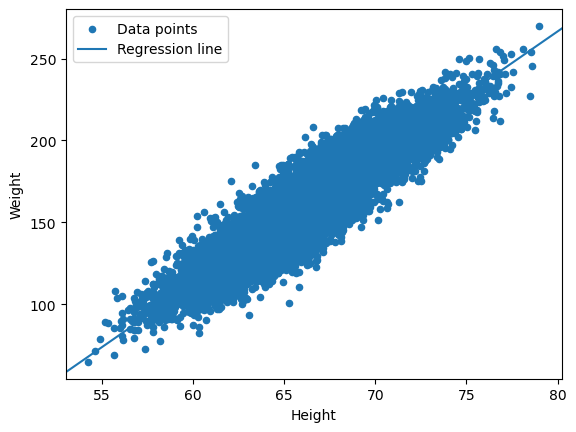

In [5]:
fig, ax = plt.subplots()
df.plot.scatter(x="Height", y="Weight", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

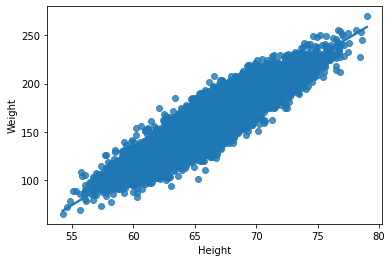

In [13]:
sns.regplot(x="Height", y="Weight", data=df);
